In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation
from numba import njit
import time
from tqdm import tqdm

In [2]:
max_iter = 10**2

In [20]:
def julia_map(z, C):
    return z**2 + C

def julia_algo(z, C, max_iter=max_iter):
    for i in range(max_iter):
        z = julia_map(z, C)
        if abs(z) > 100:
            return i
    
    return max_iter

def get_set(width, C, size=1000):
    xs = ys = np.linspace(-width, width, size)
    Z = np.zeros((len(xs), len(xs)), dtype=np.uint8)

    for i, x in enumerate(xs):
        for j, y in enumerate(ys):
            Z[i][j] = julia_algo(complex(x, y), C)
    
    return Z

In [21]:
@njit
def julia_map2(z, C):
    return z**2 + C

@njit
def julia_algo2(z, C, max_iter=max_iter):
    for i in range(max_iter):
        z = julia_map2(z, C)
        if abs(z) > 100:
            return i
    
    return max_iter

@njit
def get_set2(width, C, size=1000):
    xs = ys = np.linspace(-width, width, size)
    Z = np.zeros((len(xs), len(xs)), dtype=np.uint8)

    for i, x in enumerate(xs):
        for j, y in enumerate(ys):
            Z[i][j] = julia_algo2(complex(x, y), C)
    
    return Z

In [26]:
width = 1.5
C = complex(-0.5251993, -0.5251993)

Z = get_set(width, C)
Z2 = get_set2(width, C)

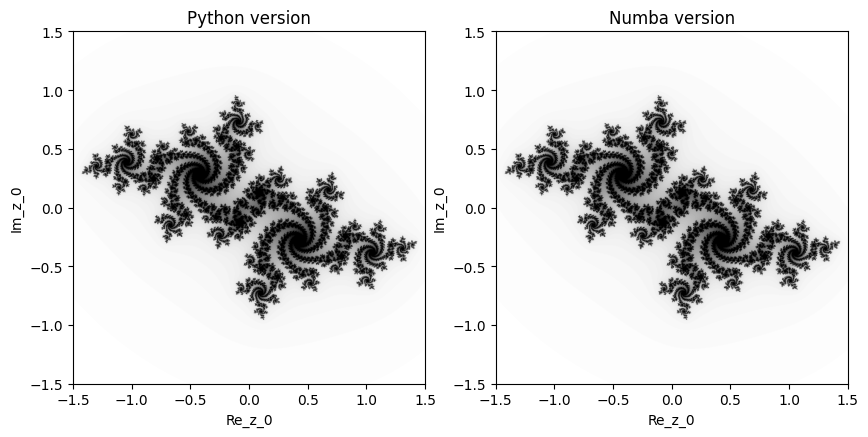

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(Z.T, cmap=cm.binary, extent=[-width, width, -width, width])
axes[0].set_xlabel(f'Re_z_{0}')
axes[0].set_ylabel(f'Im_z_{0}')
axes[0].set_title('Python version')

axes[1].imshow(Z2.T, cmap=cm.binary, extent=[-width, width, -width, width])
axes[1].set_xlabel(f'Re_z_{0}')
axes[1].set_ylabel(f'Im_z_{0}')
axes[1].set_title('Numba version')

plt.show()

In [34]:
ticks = 50
a = np.linspace(0, 2*np.pi, ticks)
c = np.exp(1j * a)
width = 2

In [35]:
python_times = []
numba_times = []
c_sizes = [5, 10, 20, 35, 50]

for i in c_sizes:
    c_tmp = c[:i]
    python_time = 0
    numba_time = 0
    for C in tqdm(c_tmp):
        start = time.perf_counter()
        Z = get_set(width, C)
        end = time.perf_counter()
        python_time += end - start

        start = time.perf_counter()
        Z2 = get_set2(width, C)
        end = time.perf_counter()
        numba_time += end - start
    
    python_times.append(python_time)
    numba_times.append(numba_time)

100%|██████████| 50/50 [02:11<00:00,  2.64s/it]


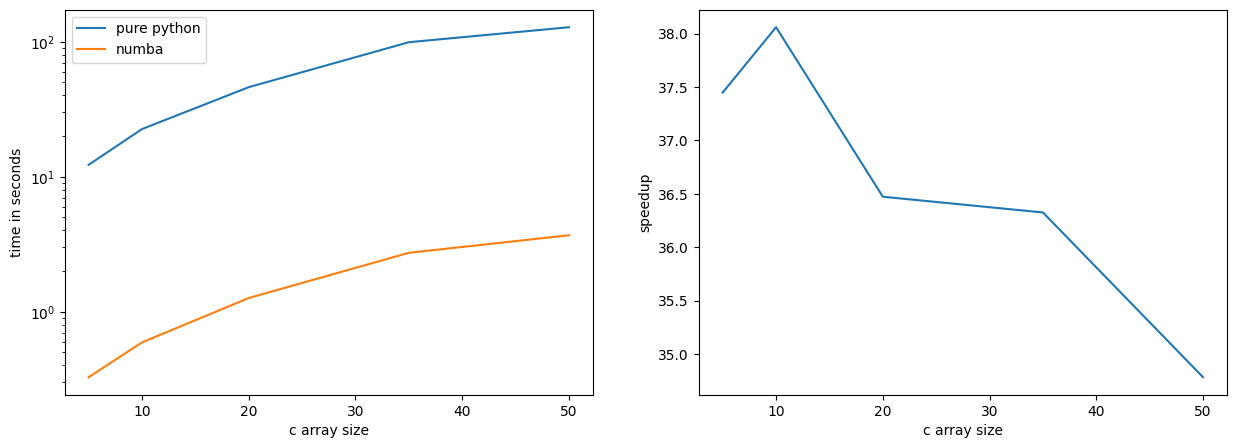

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(c_sizes, python_times, label='pure python')
axes[0].plot(c_sizes, numba_times, label='numba')
axes[0].set_xlabel('c array size')
axes[0].set_ylabel('time in seconds')
axes[0].set_yscale('log')
axes[0].legend()

axes[1].plot(c_sizes, np.array(python_times) / np.array(numba_times))
axes[1].set_xlabel('c array size')
axes[1].set_ylabel('speedup')

plt.show()